https://andrewcharlesjones.github.io/journal/gplvm.html

In [1]:
import numpy as onp
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from autograd import grad, value_and_grad
import autograd.numpy as np
from autograd.misc.optimizers import adam
import autograd.scipy.stats.multivariate_normal as mvn
from scipy.optimize import minimize

In [3]:
inv = np.linalg.inv
#import matplotlib
import matplotlib as mpl
font = {"size": 20}
mpl.rc("font", **font)
#matplotlib.rcParams["text.usetex"] = True
#https://stackoverflow.com/questions/58121461/runtimeerror-failed-to-process-string-with-tex-because-latex-could-not-be-found
mpl.rcParams.update(mpl.rcParamsDefault)

In [4]:
def make_parabola_data(n=100, sigma2=1):
	x1 = np.sqrt(np.linspace(0, 3, n//2))
	x1 = np.concatenate([-x1, x1])
	x1 = np.sort(x1)
	x2 = x1**2 + np.random.normal(scale=np.sqrt(sigma2), size=n)
	return np.vstack([x1, x2]).T

def rbf_kernel(x1, x2):
	output_scale = 1
	lengthscales = 1
	diffs = np.expand_dims(x1 / lengthscales, 1)\
		  - np.expand_dims(x2 / lengthscales, 0)
	return output_scale * np.exp(-0.5 / 10 * np.sum(diffs**2, axis=2))

def linear_kernel(x1, x2):
	return x1 @ x2.T

def gaussian_log_likelihood(X, mean, covariance, sigma2=1):
	ll = np.sum([mvn.logpdf(X[:, ii], mean, covariance) for ii in range(D)])
	return ll

def gaussian_prior(Z):
	covariance = np.eye(n)
	mean = np.zeros(n)
	ll = np.sum([mvn.logpdf(Z[:, ii], mean, covariance) for ii in range(d)])
	return ll

def objective(Z):
	# The objective is the negative log likelihood of the data.
	Z = np.reshape(Z, (n, d))
	cov_mat = kernel(Z, Z) + np.eye(n)
	ll = gaussian_log_likelihood(X, zero_mean, cov_mat)
	lprior = gaussian_prior(Z)
	return -(ll + lprior)

In [5]:
def callback(params):
	print('Log likelihood: {0:1.3e}'.format(-objective(params)))

	Z = np.reshape(params, (n, d))

	data_ax.cla()
	data_ax.scatter(X[:, 0], X[:, 1], c=Z[:, 0])
	data_ax.set_title('Observed Data')
	data_ax.set_xlabel(r"$x1$")
	data_ax.set_ylabel(r"$x2$")

	latent_ax.cla()
	#latent_ax.plot(X[:, 0], Z[:, 0], 'kx')
	latent_ax.plot(X[:, 0], Z[:, 0])
	latent_ax.set_xlim([-2, 2])
	latent_ax.set_ylim([-2, 2])
	latent_ax.set_xlabel(r"$x1$")
	latent_ax.set_ylabel(r"$z$")
	latent_ax.set_title('Latent coordinates')

	plt.draw()
	plt.pause(1.0/60.0)
	plt.show(block=False)

Log likelihood: -7.697e+02


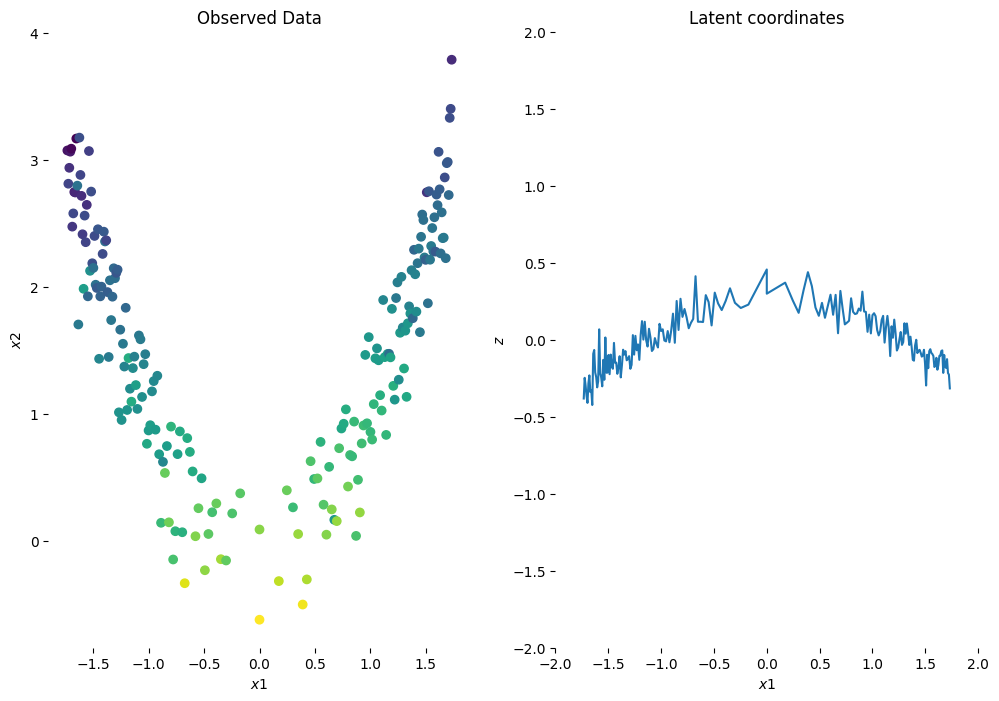

Log likelihood: -7.571e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.395e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.222e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.172e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.048e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.038e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.024e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.022e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.021e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.021e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.021e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.021e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.021e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.021e+02


<Figure size 640x480 with 0 Axes>

Log likelihood: -7.021e+02


<Figure size 640x480 with 0 Axes>

In [6]:
fig = plt.figure(figsize=(12,8), facecolor='white')
data_ax = fig.add_subplot(121, frameon=False)
latent_ax = fig.add_subplot(122, frameon=False)
#plt.show(block=False)

n = 200
D = 2
d = 1
zero_mean = np.zeros(n)
X = make_parabola_data(n=n, sigma2=0.1)

kernel = rbf_kernel
init_params = np.random.normal(size=(n * d))

res = minimize(value_and_grad(objective), init_params, jac=True, method='CG', callback=callback)
fitted_Z = np.reshape(res.x, (n, d))

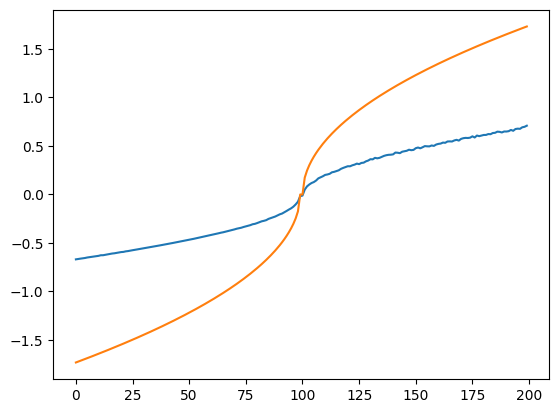

In [7]:
plt.plot(fitted_Z[:, 0])
plt.plot(X[:,0])
plt.show()

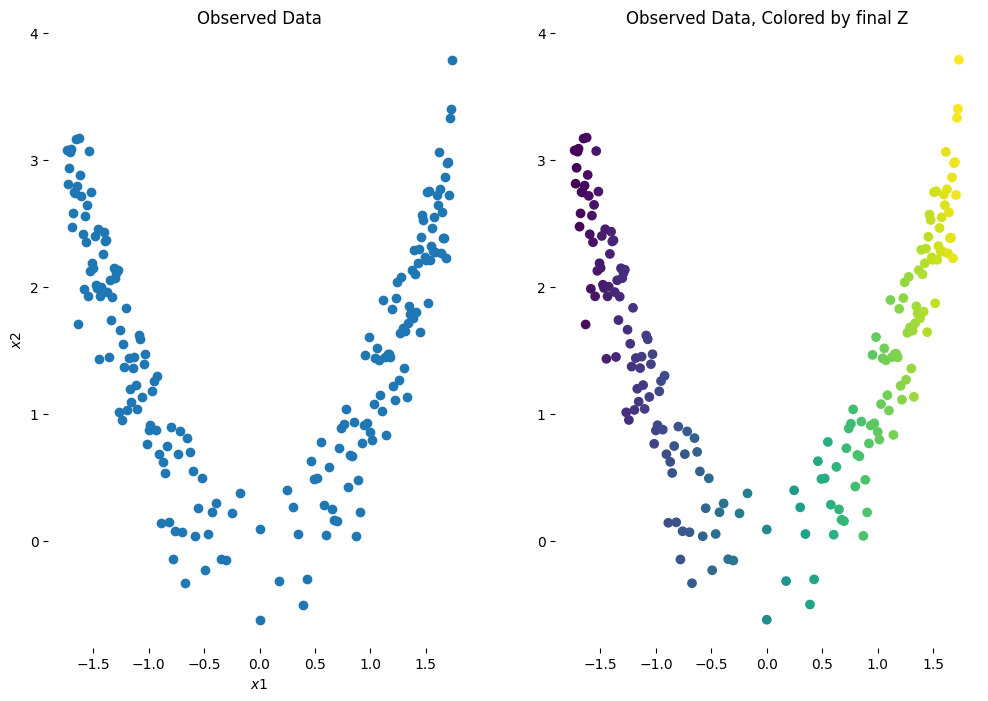

In [8]:
fig = plt.figure(figsize=(12,8), facecolor='white')
data_ax = fig.add_subplot(121, frameon=False)
latent_ax = fig.add_subplot(122, frameon=False)

data_ax.cla()
data_ax.scatter(X[:, 0], X[:, 1])
data_ax.set_title('Observed Data')
data_ax.set_xlabel(r"$x1$")
data_ax.set_ylabel(r"$x2$")


latent_ax.cla()
latent_ax.scatter(X[:, 0], X[:, 1], c = fitted_Z[:,0])
data_ax.set_xlabel(r"$x1$")
data_ax.set_ylabel(r"$x2$")
latent_ax.set_title('Observed Data, Colored by final Z')

plt.draw()
#plt.pause(1.0/60.0)
plt.show(block=False)